In [2]:
import os
import math
import random
import numpy as np
import pandas as pd

In [54]:
from numpy import mean, std

def CalcWeight(x):
    m, n = x.shape
    s = np.zeros((1,1), dtype=float)
    cv = np.zeros((1,n), dtype=float)
    weight = np.zeros((1,n), dtype=float)
    
    for i in range(n):
        cv[0][i] = std(x_data[:,i])/mean(x_data[:,i])
        
    s = np.sum(cv, axis=1)
    
    for j in range(n):
        weight[0][j] = cv[0][j] / s
    return weight

In [80]:
def initCentroid(x,k):
    n = np.size(x,0)
    idx_rand = np.array(random.sample(range(1,n), k))
    centroid = x[idx_rand, :]
    return centroid

def __check_params(data, k, weights, max_iter, tol):
    if k <= 0 or k > data.shape[0]:
        raise ValueError("k must be > 0 and <= {}, got {}".format(data.shape[0], k))

    if weights.size != data.shape[1]:
        raise ValueError("weights length expected {}, got {}".format(data.shape[0], len(weights)))

    if max_iter <= 0:
        raise ValueError("max_iter must be > 0, got {}".format(max_iter))

    if tol < 0.0:
        raise ValueError("tol must be >= 0.0, got {}".format(tol))
        
def sqrsum(x):
    return np.sum(x * x)

In [56]:
from sklearn import preprocessing

orig_data = pd.read_excel('test4.xlsx')
orig_data.dropna(inplace=True)

x_orig_data = orig_data.drop('TRUE VALUE',axis=1)
y_label = orig_data['TRUE VALUE']

process = preprocessing.MinMaxScaler()
x_data = process.fit_transform(x_orig_data)

In [82]:
n_iters = 5
n_clusters = 2
centroids = np.zeros((n_clusters,30), dtype=float)
centroids = initCentroid(x_data, n_clusters)
print(centroids)

[[5.65092166e-01 5.61224490e-02 1.65671642e-01 3.82775120e-03
  5.15091848e-01 3.76470588e-02 2.04447633e-01 1.83961337e-01
  3.95519547e-01]
 [5.89017857e-01 2.04081633e-04 7.46268657e-09 1.72248804e-03
  2.17525663e-01 1.08152941e-02 9.28388508e-01 1.70067636e-04
  4.10733105e-01]]


In [61]:
loss = np.zeros(n_iters)

dist = np.zeros((x_data.shape[0],n_clusters), dtype=float)

for i in range(n_iters):
    for j in range(x_data.shape[0]):
        distance = np.power(x_data[j,:]-centroids, 2)  
        distance = np.sum(distance, axis=1)
        distance = np.sqrt(distance) 
        dist[j,:] = distance
    idx = np.argmin(dist, axis=1)
    loss[i] = np.mean(np.min(dist, axis=1))
    
    for k in range(n_clusters):
        d = x_data[idx==k, :]
        if k == 0:
            data1 = d
        else:
            data2 = d
        centroids[k,:] = np.mean(d, axis=0)
print("Kmeans Finish!")
print(data1.shape, data2.shape)

Kmeans Finish!
(474, 9) (498, 9)


In [103]:
from sklearn import preprocessing

orig_data = pd.read_excel('test4.xlsx')
orig_data.dropna(inplace=True)

x_orig_data = orig_data.drop('TRUE VALUE',axis=1)
y_label = orig_data['TRUE VALUE']

process = preprocessing.MinMaxScaler()
x_data = process.fit_transform(x_orig_data)

dist = np.zeros((x_data.shape[0],n_clusters), dtype=float)

n_iters = 5
n_clusters = 2
centroids = initCentroid(x_data, n_clusters)
print("initial centroids are:",centroids)

w = CalcWeight(x_data)
tol=1e-7
C = np.zeros(n_iters)
__check_params(x_data, 2, w, n_iters, tol)

for i in range(n_iters):
    old_centroids=centroids.copy()
    for j in range(x_data.shape[0]):
        distance = np.power(x_data[j,:]-centroids, 2)  
#        print(x_data[j,:].shape,centroids.shape, distance.shape)
        distance = np.sum(w*distance, axis=1)
#        print(distance.shape)
        distance = np.sqrt(distance) 
        dist[j,:] = distance
    idx = np.argmin(dist, axis=1)
    loss_w[i] = np.mean(np.min(dist, axis=1))

    for k in range(n_clusters):
        d = x_data[idx==k, :]
        if k == 0:
            data1 = d
        else:
            data2 = d
        centroids[k,:] = np.mean(d, axis=0)
    
    centroid_change=sqrsum(centroids - old_centroids)
    C[i]=centroid_change
    if centroid_change <= tol:
            break
print("CVWKmeans Finish!")
print(data1.shape,data2.shape)
print(C)

initial centroids are: [[5.91013825e-01 0.00000000e+00 1.18805970e-01 4.88995215e-01
  2.01771627e-01 3.64705882e-02 4.19296987e-01 2.41545705e-02
  4.07307347e-01]
 [5.86767485e-01 6.12244898e-04 1.00000000e-05 1.10047847e-03
  2.20256057e-01 1.05882353e-02 9.24794051e-01 2.84038653e-04
  4.09323511e-01]]
CVWKmeans Finish!
(197, 9) (775, 9)
[9.31059554e-02 7.27233025e-06 0.00000000e+00 0.00000000e+00
 0.00000000e+00]


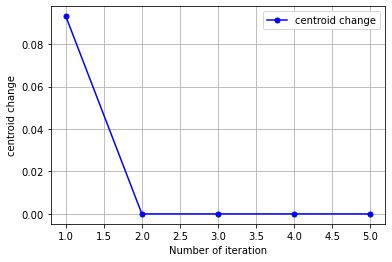

In [104]:
import matplotlib.pyplot as plt

plt.plot(np.arange(n_iters)+1, C, color='blue', marker='o', markersize=5, label='centroid change')
plt.grid(True)
plt.xlabel("Number of iteration")
plt.ylabel("centroid change")
plt.legend(loc='best')
#plt.ylim([0.01, 0.5])
plt.show()

In [43]:
loss_w

array([0.06332243, 0.06371305, 0.06371305, 0.06371305, 0.06371305])

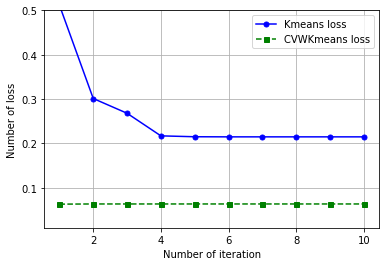

In [60]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(np.arange(n_iters)+1, loss, color='blue', marker='o', markersize=5, label='Kmeans loss')
plt.plot(np.arange(n_iters)+1, loss_w, color='green', linestyle='--', marker='s', markersize=5, label='CVWKmeans loss')

plt.grid(True)
plt.xlabel("Number of iteration")
plt.ylabel("Number of loss")
plt.legend(loc='best')
plt.ylim([0.01, 0.5])
plt.show()